# Ames Housing Home Prices Prediction
## Using Linear Regression for Machine Learning

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams.update({'font.size': 12})

## Load Data

In [2]:
url = 'http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls'
housing_df = pd.read_excel(url)
# Save original dataset
housing_df.to_csv('../data/housing.csv')

In [3]:
# Make column labels lowercase
housing_df.columns = map(str.lower, housing_df.columns)
# Replace spaces in columns with underscore
housing_df.columns = housing_df.columns.str.replace('\s+', '_')

In [4]:
housing_df.head()

,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
housing_df.shape

(2930, 82)

In [6]:
# Set 'Id' column as index
housing_df.set_index('order', inplace=True)
# Drop 'pid' column if not needed
# housing_df.drop('pid',axis=1, inplace=True)
housing_df.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Exploratory Data Analysis (EDA)

### A. Data Types

In [7]:
housing_df.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

In [8]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
pid                2930 non-null int64
ms_subclass        2930 non-null int64
ms_zoning          2930 non-null object
lot_frontage       2440 non-null float64
lot_area           2930 non-null int64
street             2930 non-null object
alley              198 non-null object
lot_shape          2930 non-null object
land_contour       2930 non-null object
utilities          2930 non-null object
lot_config         2930 non-null object
land_slope         2930 non-null object
neighborhood       2930 non-null object
condition_1        2930 non-null object
condition_2        2930 non-null object
bldg_type          2930 non-null object
house_style        2930 non-null object
overall_qual       2930 non-null int64
overall_cond       2930 non-null int64
year_built         2930 non-null int64
year_remod/add     2930 non-null int64
roof_style         2930 non-null object
roof_matl          2

**MSSubClass: Identifies the type of dwelling involved in the sale.**	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
The MSSubClass was converted to int64 by Pandas because the column is all integers. However, these are categories that have been assigned arbitrary numbers for classification purposes.

In [9]:
# Convert 'MSSubClass' column to type(str)
housing_df['ms_subclass'] = housing_df['ms_subclass'].astype(str)

In [10]:
housing_df['ms_subclass'].dtype

dtype('O')

### B. Plot Histograms of the Numeric Columns

In [11]:
# Create list of numeric columns
numeric_columns = housing_df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)

['pid', 'lot_frontage', 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice']


In [12]:
# Print how many numeric columns so figure out plot grid
print('\n', len(numeric_columns), 'numerical columns')


 37 numerical columns


In [13]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,100))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax, alpha=0.8)
        plt.axvline(df[var_name].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(df[var_name].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
        ax.set_title(var_name+" Distribution")
        plt.legend()
    fig.tight_layout()
    plt.savefig('../assets/png/histograms.png')
    plt.show()

In [110]:
# The following cell has been commented out as it uses too much memory for WordPress.
# Hot linking image from caprinomics.com in MarkDown Cell

# draw_histograms(housing_df, numeric_columns, int(len(numeric_columns)/2)+1, 2)

![alt text](http://www.caprinomics.com/wp-content/uploads/2018/01/histograms.png)

### C. Plot the Numeric Columns Against ```saleprice``` Using Scatterplots

In [108]:
# Draw scatter plots of numerical columns
def draw_scatters(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,60))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.regplot(x=var_name,y='saleprice',data=df,fit_reg=False, scatter_kws={'alpha':0.2})
        ax.set_title(var_name +" vs. Sale Price")
    fig.tight_layout()
    plt.savefig('../assets/png/scatters.png')
    plt.show()

In [111]:
# The following cell has been commented out as it uses too much memory for WordPress.
# Hot linking image from caprinomics.com in MarkDown Cell

# draw_scatters(housing_df, numeric_columns[:-1], int(len(numeric_columns[:-1])/2)+1, 2)

![alt text](http://www.caprinomics.com/wp-content/uploads/2018/01/scatters-1.png)

### D. Use Bar Plots to Plot Categorical Features against ```saleprice```

In [17]:
# Create list of categorical columns
cat_columns = housing_df.select_dtypes(include=[object]).columns.tolist()
print(cat_columns)

['ms_subclass', 'ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc', 'central_air', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature', 'sale_type', 'sale_condition']


In [18]:
# Print how many categorical columns so figure out plot grid
print(len(cat_columns), 'categorical columns')

44 categorical columns


In [19]:
# Draw bar plots of categorical data
def draw_bars(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,160))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.barplot(x=var_name,y='saleprice',data=df,ci='sd')
        if var_name in ['neighborhood','exterior_1st','exterior_2nd']:
            plt.sca(ax)
            plt.xticks(rotation=70)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.savefig('../assets/png/bars.png')
    plt.show()

In [114]:
# The following cell has been commented out as it uses too much memory for WordPress.
# Hot linking image from caprinomics.com in MarkDown Cell

# draw_bars(housing_df, cat_columns, int(len(cat_columns)/2)+1, 2)

![alt text](http://www.caprinomics.com/wp-content/uploads/2018/01/bars-1.png)

### D. Plot Correlations

In [21]:
corr = housing_df.corr()
corr['saleprice'].sort_values(ascending=False)

saleprice          1.000000
overall_qual       0.799262
gr_liv_area        0.706780
garage_cars        0.647877
garage_area        0.640401
total_bsmt_sf      0.632280
1st_flr_sf         0.621676
year_built         0.558426
full_bath          0.545604
year_remod/add     0.532974
garage_yr_blt      0.526965
mas_vnr_area       0.508285
totrms_abvgrd      0.495474
fireplaces         0.474558
bsmtfin_sf_1       0.432914
lot_frontage       0.357318
wood_deck_sf       0.327143
open_porch_sf      0.312951
half_bath          0.285056
bsmt_full_bath     0.276050
2nd_flr_sf         0.269373
lot_area           0.266549
bsmt_unf_sf        0.182855
bedroom_abvgr      0.143913
screen_porch       0.112151
pool_area          0.068403
mo_sold            0.035259
3ssn_porch         0.032225
bsmtfin_sf_2       0.005891
misc_val          -0.015691
yr_sold           -0.030569
bsmt_half_bath    -0.035835
low_qual_fin_sf   -0.037660
overall_cond      -0.101697
kitchen_abvgr     -0.119814
enclosed_porch    -0

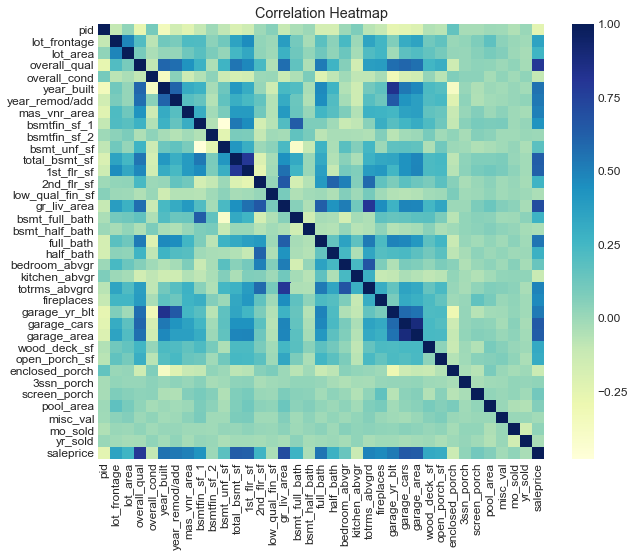

In [22]:
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.savefig('../assets/png/heatmap.png')
plt.show()

## 3. Preprocessing

### A. Identify and Remove Outliers from ```saleprice```

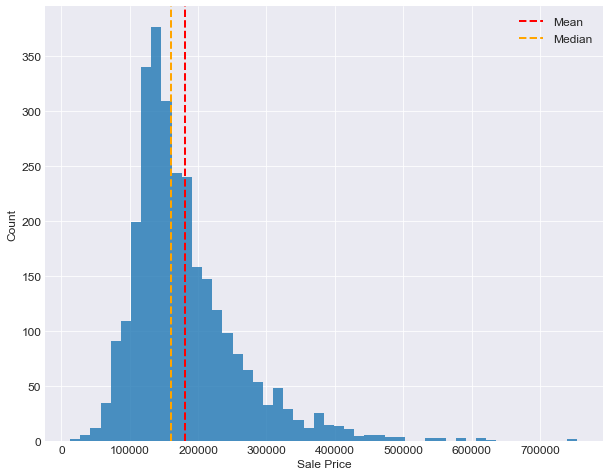

In [23]:
housing_df['saleprice'].hist(bins=50, alpha=0.8)
plt.axvline(housing_df['saleprice'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(housing_df['saleprice'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.legend()
plt.show()

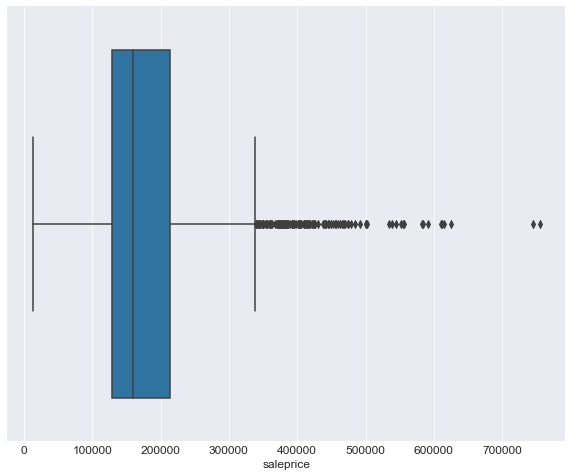

In [24]:
sns.boxplot(housing_df['saleprice'], orient='h')
plt.show()

In [25]:
housing_df['saleprice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: saleprice, dtype: float64

In [26]:
# Create function to reject outliers, default stdev is 1.5
def reject_outliers(data, m=1.5):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

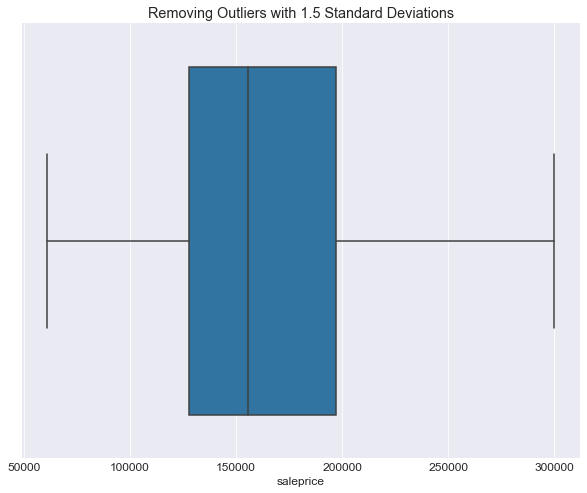

In [27]:
# Box plot showing the outliers gone away with m=1.5
sns.boxplot(reject_outliers(housing_df['saleprice']),
            orient='h').set_title('Removing Outliers with 1.5 Standard Deviations')
plt.show()

In [28]:
# Make series of mask
mask = reject_outliers(housing_df['saleprice']).tolist()
mask[0:20]

[215000,
 105000,
 172000,
 244000,
 189900,
 195500,
 213500,
 191500,
 236500,
 189000,
 175900,
 185000,
 180400,
 171500,
 212000,
 164000,
 141000,
 210000,
 190000,
 170000]

In [29]:
# Mask as Boolean
mask_results = housing_df['saleprice'].isin(mask)[0:20].tolist()
mask_results

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True]

In [30]:
outliers_dict = dict(zip(mask, mask_results))
outliers_dict

{105000: True,
 141000: True,
 164000: False,
 170000: True,
 171500: True,
 172000: True,
 175900: True,
 180400: True,
 185000: True,
 189000: True,
 189900: True,
 190000: True,
 191500: True,
 195500: True,
 210000: False,
 212000: True,
 213500: True,
 215000: True,
 236500: True,
 244000: True}

In [31]:
# New dataframe based off mask
housing_df = housing_df[~housing_df['saleprice'].isin(mask) == False]
housing_df.head(20)

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [32]:
# Prince new 'saleprice' stat data
housing_df['saleprice'].describe()

count      2673.000000
mean     165117.181444
std       51751.938795
min       61000.000000
25%      128000.000000
50%      155500.000000
75%      197000.000000
max      300000.000000
Name: saleprice, dtype: float64

### B. Fill Missing Data

In [33]:
# Columns with null (np.nan) values
nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nan_col_list

['lot_frontage',
 'alley',
 'mas_vnr_type',
 'mas_vnr_area',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'electrical',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'misc_feature']

In [34]:
# Sum of nan values of each column
nulls = housing_df[nan_col_list].isnull().sum()
nulls

lot_frontage       471
alley             2482
mas_vnr_type        19
mas_vnr_area        19
bsmt_qual           74
bsmt_cond           74
bsmt_exposure       77
bsmtfin_type_1      74
bsmtfin_sf_1         1
bsmtfin_type_2      75
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
electrical           1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1390
garage_type        145
garage_yr_blt      147
garage_finish      147
garage_cars          1
garage_area          1
garage_qual        147
garage_cond        147
pool_qc           2663
fence             2115
misc_feature      2569
dtype: int64

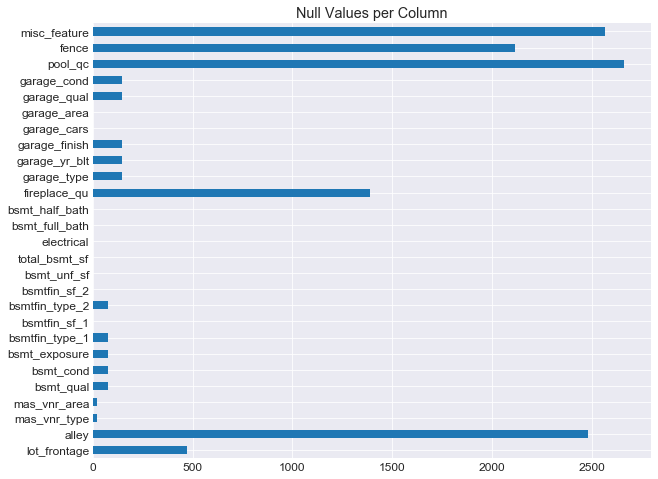

In [35]:
nulls.plot(kind='barh', title='Null Values per Column')
plt.show()

In [36]:
# Find how many missing values and percentage missing in each column
# This gives me an idea of priority
print('Missing data in each dataframe column:')
for col in housing_df.columns:
    missing_data = len(housing_df) - housing_df[col].count()
    if (missing_data > 0 or missing_data =='NaN'):
         print(col, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(housing_df))) * 
             100, 3)), '% of total')

Missing data in each dataframe column:
lot_frontage : 471 missing values is 17.621 % of total
alley : 2482 missing values is 92.854 % of total
mas_vnr_type : 19 missing values is 0.711 % of total
mas_vnr_area : 19 missing values is 0.711 % of total
bsmt_qual : 74 missing values is 2.768 % of total
bsmt_cond : 74 missing values is 2.768 % of total
bsmt_exposure : 77 missing values is 2.881 % of total
bsmtfin_type_1 : 74 missing values is 2.768 % of total
bsmtfin_sf_1 : 1 missing values is 0.037 % of total
bsmtfin_type_2 : 75 missing values is 2.806 % of total
bsmtfin_sf_2 : 1 missing values is 0.037 % of total
bsmt_unf_sf : 1 missing values is 0.037 % of total
total_bsmt_sf : 1 missing values is 0.037 % of total
electrical : 1 missing values is 0.037 % of total
bsmt_full_bath : 2 missing values is 0.075 % of total
bsmt_half_bath : 2 missing values is 0.075 % of total
fireplace_qu : 1390 missing values is 52.001 % of total
garage_type : 145 missing values is 5.425 % of total
garage_yr_bl

In [37]:
# Build a list of colums where NaN should be a string 'NA'
col_na = ['misc_feature',
          'fence',
          'pool_qc',
          'garage_cond',
          'garage_qual',
          'garage_finish',
          'garage_type',
          'fireplace_qu',
          'bsmtfin_type_1',
          'bsmtfin_type_2',
          'bsmt_exposure',
          'alley']

In [38]:
housing_df[col_na] = housing_df[col_na].fillna('NA')
print(housing_df.shape)
housing_df.head()

(2673, 81)


,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


That gets rid of all the NaN values associated with pandas importing the 'NA' string as NaN

In [39]:
# Function to make random distribution based on existing data
def make_randoms(df, col):
    return np.random.normal(df[col].mean(),
                            scale=df[col].std(),
                            size=df[col].isnull().sum()).astype(int)

In [40]:
# Use random number generator to create a series of numbers based on 'garage_yr_blt' statistics
garage_yr_blt_rand = make_randoms(housing_df,'garage_yr_blt')
garage_yr_blt_rand

array([1988, 1916, 1982, 1955, 1930, 1997, 1972, 1969, 1981, 1944, 1963,
       1974, 1963, 1952, 1977, 1986, 1910, 2007, 1966, 1995, 2027, 1972,
       2027, 1930, 1991, 1942, 1990, 2005, 1965, 1978, 1975, 1985, 1972,
       1969, 1954, 1994, 1957, 1931, 1965, 1950, 1982, 1995, 2000, 1987,
       1967, 1985, 2008, 1970, 1981, 2021, 1942, 2019, 1982, 1956, 1968,
       1924, 1959, 1980, 1973, 2021, 2010, 1992, 1962, 2008, 1964, 1950,
       1956, 2007, 1948, 1986, 1964, 1971, 1966, 1976, 2014, 2019, 1961,
       1958, 1992, 1977, 1977, 1982, 1951, 1947, 2010, 2023, 1989, 1984,
       1971, 1949, 1963, 1955, 2002, 1992, 1987, 2026, 2001, 1944, 1984,
       2032, 1969, 1996, 2015, 1981, 2001, 2018, 2007, 2005, 1961, 2015,
       1941, 1939, 2003, 1976, 1972, 1992, 1981, 1948, 1954, 2016, 1982,
       1985, 1983, 1948, 1993, 1981, 1938, 2019, 1980, 2006, 1949, 1944,
       1975, 1999, 1950, 1971, 1982, 1934, 1974, 1988, 1980, 2006, 1971,
       1977, 1974, 1966, 1958])

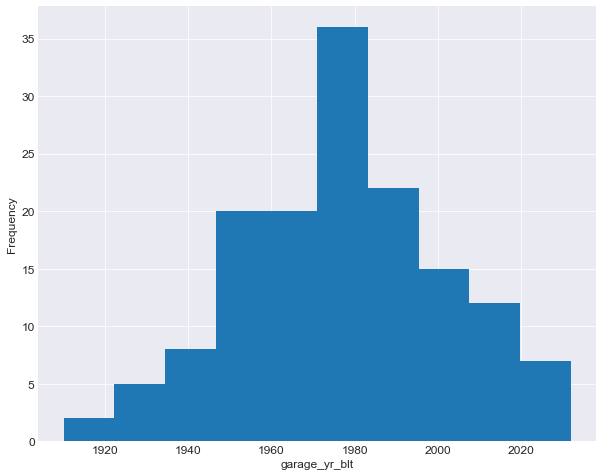

In [41]:
# Plot the random distribution of the 'garage_yr_blt' column
plt.hist(garage_yr_blt_rand)
plt.xlabel('garage_yr_blt')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Use random number generator to create a series of numbers based on 'LotFrontage' statistics
lot_frontage_rand = make_randoms(housing_df,'lot_frontage')
lot_frontage_rand

array([ 67,  55,  31,  80,  79,  27,  44,  59,  58,  30,  58,  94,  73,
        34,  63,  42,  41,  60,  50,  66,  50,  17,  81, 107,  59,  70,
        84,  89,  40,  37,  66,  41,  47,  90, 104,  49,  66,  77,  74,
        51,  87,  62,  68,  60,  64,  88,  65,  69, 104,  61, 103,  51,
        39,  77,  95,  30, 122,  29,  98,  66,  73,  88,  51,  79,  53,
        53,  70,  67,  76,  52,  72,  49,  65,  57,  59,  41,  16,  70,
        49,  71,  79, 109,  29, 125,  69, 108,  47,  53,  62,  82,  33,
        87,  92,  68, 109,  59,  61,  64,  30,  79,  18,  20,  81,  35,
        59, 110,  72,  23,  54,  53,  65,  51,  78,  93,  67,  20,  91,
        97,  53, 103,  38,  89,  70,  64,  70,  61,  49,  49,  60,  76,
        76,  79,  55,  44,  62,  81,  57,  50,  72,  85,  78,  79,  55,
        78,  77,  58,  68,  83,  86,  81,  54,  70,  62,  89,  57,  86,
        80,  68, 101,  77,  48,  81,  47, 110,  64,  68,  77,  74,  36,
        61,  70,  60,  98,  89,  86,  25,  89,  39,  50,  68, 10

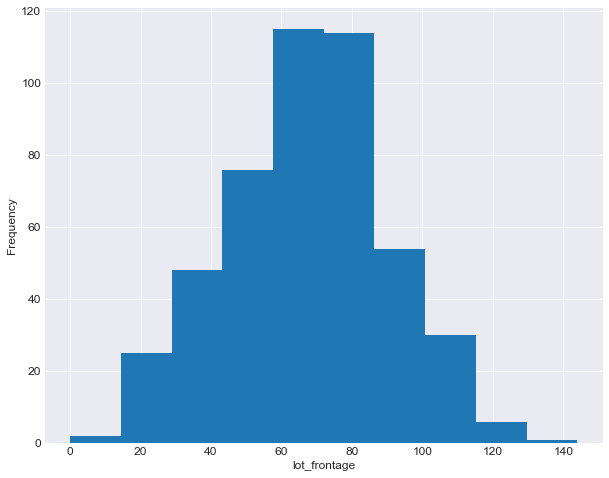

In [43]:
# Plot the random distribution of the 'LotFrontage' column
plt.hist(lot_frontage_rand)
plt.xlabel('lot_frontage')
plt.ylabel('Frequency')
plt.show()

In [44]:
# Replace the NaNs with teh random data using this method because I don't
# have enough fucking time to find a more efficient method
housing_df['lot_frontage'] = housing_df['lot_frontage'].fillna('9999')
housing_df['garage_yr_blt'] = housing_df['garage_yr_blt'].fillna('9999')
housing_df.loc[housing_df['lot_frontage']=='9999','lot_frontage'] = lot_frontage_rand
housing_df.loc[housing_df['garage_yr_blt']=='9999','garage_yr_blt'] = garage_yr_blt_rand

In [45]:
# Drop the rest
print('Before: ', housing_df.shape)
housing_df = housing_df.dropna()
print('After: ', housing_df.shape)

Before:  (2673, 81)
After:  (2578, 81)


In [46]:
# Verify that all null values are gone
nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nan_col_list

[]

In [47]:
nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nulls = housing_df[nan_col_list].isnull().sum()
nulls

Series([], dtype: float64)

### C. Create Dummy Variables for Categorical Columns

In [48]:
housing_df.head(20)

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,6,2010,WD,Normal,195500
7,527127150,120,RL,41,4920,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,213500
8,527145080,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,...,0,NA,NA,NA,0,1,2010,WD,Normal,191500
9,527146030,120,RL,39,5389,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,3,2010,WD,Normal,236500


In [49]:
# Re-index housing_df so indices match 
housing_df.reset_index(inplace=True)
housing_df.head(20)

,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41,4920,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43,5005,Pave,NA,IR1,HLS,...,0,NA,NA,NA,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39,5389,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60,7500,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,6,2010,WD,Normal,189000


In [50]:
dummies_df = pd.get_dummies(housing_df[cat_columns],prefix_sep='_',drop_first=False)
print(dummies_df.shape)
dummies_df.head(20)

(2578, 287)


,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,...,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [51]:
housing_df = pd.concat([housing_df, dummies_df], axis=1)
print(housing_df.shape)
housing_df.head(20)

(2578, 369)


,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
1,2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,...,0,0,0,1,0,0,0,0,1,0
2,3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
3,4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,...,0,0,0,1,0,0,0,0,1,0
4,5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
5,6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
6,7,527127150,120,RL,41,4920,Pave,NA,Reg,Lvl,...,0,0,0,1,0,0,0,0,1,0
7,8,527145080,120,RL,43,5005,Pave,NA,IR1,HLS,...,0,0,0,1,0,0,0,0,1,0
8,9,527146030,120,RL,39,5389,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
9,10,527162130,60,RL,60,7500,Pave,NA,Reg,Lvl,...,0,0,0,1,0,0,0,0,1,0


In [52]:
housing_df.drop(cat_columns,axis=1,inplace=True)
housing_df.head()

,order,pid,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,1,526301100,141,31770,6,5,1960,1960,112.0,639.0,...,0,0,0,1,0,0,0,0,1,0
1,2,526350040,80,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
2,3,526351010,81,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
3,4,526353030,93,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,1,0,0,0,0,1,0
4,5,527105010,74,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0


### D. Split Data into a Train and Test Set

In [53]:
from sklearn.model_selection import train_test_split 

In [54]:
X = housing_df.drop('saleprice',axis=1)

In [55]:
y = housing_df['saleprice']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
for dataset in [X_train, X_test, y_train, y_test]:
    print(dataset.shape)

(1933, 324)
(645, 324)
(1933,)
(645,)


We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

### E. Scale the Data

In [58]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()
# fit_transform
X_train_scaled = scaler.fit_transform(X_train)
# transform
X_test_scaled = scaler.transform(X_test)

In [59]:
scaler.mean_[1]

719356525.03000522

In [60]:
scaler.scale_[1]

188512951.16482133

## 4. Modeling

Now that I've completed EDA, I can now use the training data to build a model to predict home price from the features.

### A. Benchmarking

As we get started with modeling, we should have some basis for comparison to get a sense of what a 'good' model is for this task.

For this task, I will focus on linear models. I will use the most naive of the linear models, the Linear Regression as the benchmark.

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)# Make predictions using the testing set
y_pred = regr.predict(X_test)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [63]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [  3.78166194e+00   1.49406320e-05   3.45199027e+01   6.03422421e-01
   6.21260547e+03   4.79867301e+03   4.23519140e+02   1.12080182e+02
   1.64662710e+00   1.23685862e+01   4.42474108e+00  -2.08798390e+00
   1.47052918e+01   1.64733259e+01   2.17177584e+01  -9.57172662e+00
   2.86193259e+01   2.06901987e+03   2.24515360e+02   2.55200902e+03
   4.30646941e+02  -1.34682590e+03  -1.84520255e+03   1.72692518e+02
   5.90149553e+03  -5.66633569e+00   6.45100663e+03   7.17065345e+00
   8.57969942e+00   1.85307424e+01   9.84891993e+00   1.48455065e+01
   3.74609806e+01  -2.04715773e+02  -3.48926108e-02  -1.10585130e+02
   1.70738538e+03  -1.96879048e+03  -3.69636837e-08  -1.26457373e+04
  -6.07236654e+03  -2.25673976e+03  -1.26697676e+03   1.51367660e+03
   4.98607972e+03   1.92435891e+04   9.92129483e+03  -2.05554290e+03
   7.15384266e+03   2.30641835e+03  -7.48570005e+03  -5.45763724e+03
  -5.91541020e+03  -6.21182783e+02   6.46846415e+03  -2.15983973e+04
   1.05618652e+04 

#### Results Dictionary

I will make a results `list` to hold my results. After each model fit and score, I will add a dictionary of my results to this list using `.append()`. This will give a list of dictionaries. This will come in handy later when turned into a DataFrame.

This is the pattern I will be using:

In [64]:
# Example dict
example_results = list()
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 bajillion'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '20 bajillion'}
example_results.append(result_2)

In [65]:
# Pass results into a DataFrame
pd.DataFrame(example_results)

,dataset,name,preprocessing,score
0,train,test1,raw,1 bajillion
1,train,test1,scaled,20 bajillion


#### Raw Benchmark

In [66]:
results = list()

In [67]:
benchmark_raw = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
               

In [68]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

In [69]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.926733
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.795303


#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [70]:
benchmark_raw.fit(X_train_scaled, y_train)
scaled_train_score = benchmark_raw.score(X_train_scaled, y_train)
scaled_test_score = benchmark_raw.score(X_test_scaled, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

In [71]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.267334e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,7.953035e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.265677e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.276214e+24


### B. Naive Regularization

Next I prepare a seires of fits using the three regularized linear regression models with their defeault settings.

Next, I performed each of these against both the raw and the scaled data. In this section, I fitted six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" I mean using all of the default settings.

In [72]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [73]:
# Instantiate ridge pipeline
pipeline_regr = Pipeline([('scaler',StandardScaler()),
                          ('regr',Ridge())])

In [74]:
# Append ridge() results to list
pipeline_regr.fit(X_train,y_train)
regr_train_score = pipeline_regr.score(X_train_scaled, y_train)
regr_test_score = pipeline_regr.score(X_test_scaled, y_test)

results.append({'name':'ridge',
                'model':pipeline_regr,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': regr_train_score})
results.append({'name':'ridge',
                'model':pipeline_regr,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': regr_test_score})

In [75]:
# Append ridge() scaled results to list
pipeline_regr.fit(X_train_scaled, y_train)
regr_scaled_train_score = pipeline_regr.score(X_train_scaled, y_train)
regr_scaled_test_score = pipeline_regr.score(X_test_scaled, y_test)

results.append({'name':'ridge',
                'model':pipeline_regr,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': regr_scaled_train_score})
results.append({'name':'ridge',
                'model':pipeline_regr,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': regr_scaled_test_score})

In [76]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.267334e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,7.953035e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.265677e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.276214e+24
4,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6.386239e+03
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6.004432e+03
6,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,9.267293e-01
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,8.025843e-01


In [77]:
# Instantiate ElasticNet pipeline
pipeline_regel = Pipeline([('scaler',StandardScaler()),
                           ('elastic_net',ElasticNet())])

In [78]:
# Append ElasticNet() results to list
pipeline_regel.fit(X_train,y_train)
regel_train_score = pipeline_regel.score(X_train_scaled, y_train)
regel_test_score = pipeline_regel.score(X_test_scaled, y_test)

results.append({'name':'elasticnet',
                'model':pipeline_regel,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': regel_train_score})
results.append({'name':'elasticnet',
                'model':pipeline_regel,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': regel_test_score})

In [79]:
# Append ElasticNet() scaled results to list
pipeline_regel.fit(X_train_scaled, y_train)
regel_scaled_train_score = pipeline_regel.score(X_train_scaled, y_train)
regel_scaled_test_score = pipeline_regel.score(X_test_scaled, y_test)

results.append({'name':'elasticnet',
                'model':pipeline_regel,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': regel_scaled_train_score})
results.append({'name':'elasticnet',
                'model':pipeline_regel,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': regel_scaled_test_score})

In [80]:
# Instantiate lasso pipeline
pipeline_regl = Pipeline([('scaler',StandardScaler()),
                          ('lasso',Lasso())])

In [81]:
# Append lasso() results to list
pipeline_regl.fit(X_train,y_train)
regl_train_score = pipeline_regl.score(X_train, y_train)
regl_test_score = pipeline_regl.score(X_test, y_test)

results.append({'name':'lasso',
                'model':pipeline_regl,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': regl_train_score})
results.append({'name':'lasso',
                'model':pipeline_regl,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': regl_test_score})

In [82]:
# Append scaled lasso() results to list
pipeline_regl.fit(X_train,y_train)
regl_train_scaled_score = pipeline_regl.score(X_train_scaled, y_train)
regl_test_scaled_score = pipeline_regl.score(X_test_scaled, y_test)

results.append({'name':'lasso',
                'model':pipeline_regl,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': regl_train_scaled_score})
results.append({'name':'lasso',
                'model':pipeline_regl,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': regl_test_scaled_score})

In [83]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.267334e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,7.953035e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.265677e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.276214e+24
4,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6.386239e+03
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6.004432e+03
6,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,9.267293e-01
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,8.025843e-01
8,train,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-2.870128e+01
9,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-8.654754e+00


**Note:** I see warnings here. As I are in an exploration phase with the model, this is acceptable.

In [84]:
results_df = pd.DataFrame(results)
results_df

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.267334e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,7.953035e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.265677e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.276214e+24
4,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6.386239e+03
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6.004432e+03
6,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,9.267293e-01
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,8.025843e-01
8,train,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-2.870128e+01
9,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-8.654754e+00


In [85]:
# Display just the raw test results
results_df[(results_df['preprocessing'] == 'raw') & (results_df['dataset'] == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.795303
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6004.431920
9,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-8.654754
13,test,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,raw,0.802593


In [86]:
# Display just the scaled test results
results_df[(results_df['preprocessing'] == 'scaled') & (results_df['dataset'] == 'test')]

,dataset,model,name,preprocessing,score
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.276214e+24
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,8.025843e-01
11,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,scaled,8.450066e-01
15,test,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,scaled,-6.499861e+03


In [87]:
# Display just the Benchmark models
results_df[(results_df['name'] == 'benchmark')]

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.267334e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,7.953035e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.265677e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.276214e+24


In [88]:
# Display just the Ridge model
results_df[(results_df['name'] == 'ridge')]

,dataset,model,name,preprocessing,score
4,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6386.239110
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6004.431920
6,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,0.926729
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,0.802584


In [89]:
# Display just the Lasso models
results_df[(results_df['name'] == 'lasso')]

,dataset,model,name,preprocessing,score
12,train,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,raw,0.926732
13,test,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,raw,0.802593
14,train,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,scaled,-6902.322623
15,test,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,scaled,-6499.860658


In [90]:
# Display just the ElasticNet models
results_df[(results_df['name'] == 'elasticnet')]

,dataset,model,name,preprocessing,score
8,train,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-28.701279
9,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-8.654754
10,train,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,scaled,0.897329
11,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,scaled,0.845007


### C. Cross Validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [91]:
cv_results = list()

In [92]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [93]:
alphas = np.logspace(-1,2,4)
alphas

array([   0.1,    1. ,   10. ,  100. ])

#### Display Just the Raw Test Results

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
# Find an optimal value for Ridge regression alpha using RidgeCV
optimal_ridge = RidgeCV(alphas=alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

10.0


In [96]:
# Cross-validate the Ridge regression R^2 with the optimal alpha
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X, y, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[ 0.85938688  0.89368887  0.86553478  0.85004606  0.8702186   0.70536549
  0.82818115  0.6652572   0.89370579  0.8784481 ]
0.830983292784


In [97]:
# Find an optimal value for Lasso regression alpha using RidgeCV
optimal_lasso = LassoCV(alphas=alphas, cv=10)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_)

100.0


In [98]:
# Cross-validate the Lasso regression R^2 with the optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X, y, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[ 0.85915391  0.88226681  0.87296494  0.844554    0.87705158  0.68262157
  0.8299663   0.63756021  0.89369836  0.87452499]
0.825436264891


In [99]:
# Find an optimal value for ElasticNet regression alpha using RidgeCV
optimal_elasticnet = ElasticNetCV(alphas=alphas, cv=10)
optimal_elasticnet.fit(X_train, y_train)

print(optimal_elasticnet.alpha_)

0.1


In [100]:
# Cross-validate the ElasticNet regression R^2 with the optimal alpha
elasticnet = ElasticNet(alpha=optimal_lasso.alpha_)

elasticnet_scores = cross_val_score(elasticnet, X, y, cv=10)

print(elasticnet_scores)
print(np.mean(elasticnet_scores))

[ 0.74514831  0.76270389  0.78507497  0.72096979  0.7930916   0.44529929
  0.70610382  0.46406286  0.78555359  0.67670456]
0.688471268218


#### Get Coefficients

In [101]:
# Get lasso coefficients
lasso.fit(X_train, y_train)

lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
145,108208.838558,-108208.838558,roof_matl_ClyTile
122,22781.488516,-22781.488516,condition_2_PosN
100,17019.851147,17019.851147,neighborhood_NoRidge
101,16607.957346,16607.957346,neighborhood_NridgHt
89,14972.376471,14972.376471,neighborhood_Crawfor
106,13884.230602,13884.230602,neighborhood_Somerst
126,11121.581315,11121.581315,bldg_type_1Fam
4,8377.958324,8377.958324,overall_qual
26,8093.570118,8093.570118,garage_cars
39,8045.991518,-8045.991518,ms_subclass_160


In [102]:
# Get ridge coefficients
ridge.fit(X_train, y_train)

ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(20)

,abs_coef,coef,variable
145,20046.729325,-20046.729325,roof_matl_ClyTile
122,17045.573613,-17045.573613,condition_2_PosN
100,15201.356577,15201.356577,neighborhood_NoRidge
101,14965.487339,14965.487339,neighborhood_NridgHt
106,12766.658414,12766.658414,neighborhood_Somerst
294,12170.255064,-12170.255064,pool_qc_Gd
90,11901.112509,-11901.112509,neighborhood_Edwards
89,11899.959273,11899.959273,neighborhood_Crawfor
190,11487.861727,-11487.861727,exter_qual_Ex
26,9698.337808,9698.337808,garage_cars


In [103]:
# Get elasticnet coefficients
elasticnet.fit(X_train, y_train)

elasticnet_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(elasticnet.coef_)})

elasticnet_coefs.sort_values('abs_coef', inplace=True, ascending=False)

elasticnet_coefs.head(20)

,abs_coef,coef,variable
6,471.359936,329.175130,year_built
7,453.987869,108.675072,year_remod/add
4,204.351755,7423.837027,overall_qual
5,112.182986,4572.375504,overall_cond
33,90.833610,-31.592182,pool_area
32,76.292304,49.944489,screen_porch
24,74.882177,5866.164730,fireplaces
263,58.651283,-669.771487,fireplace_qu_NA
192,53.400806,7014.110273,exter_qual_Gd
252,49.511148,-3808.769128,kitchen_qual_TA


#### Plotting Coefficients

In [104]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

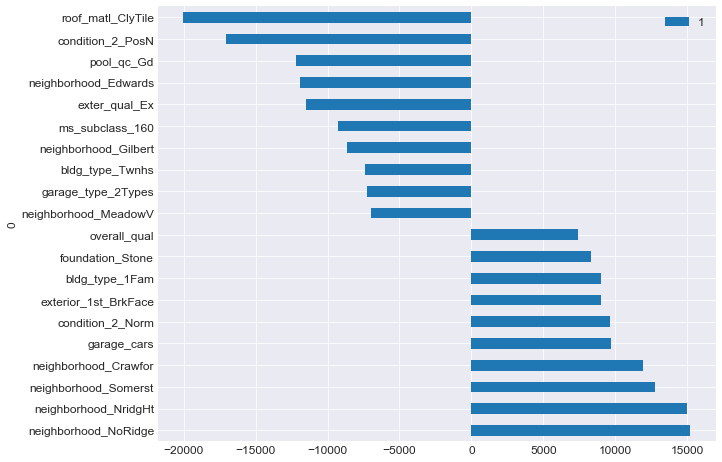

In [105]:
plot_coef(ridge)

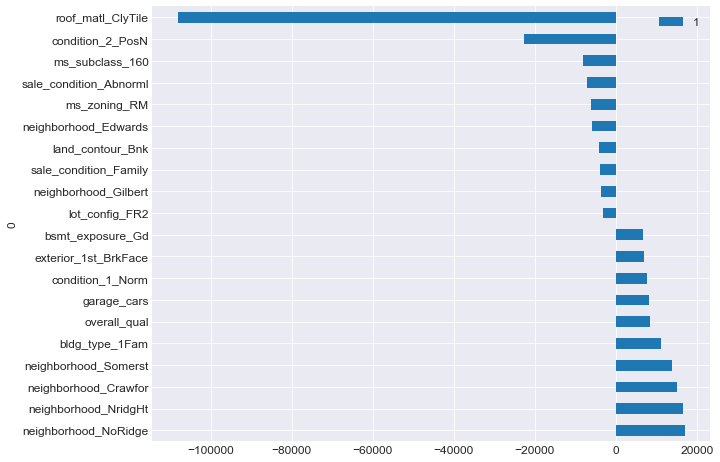

In [106]:
plot_coef(lasso)

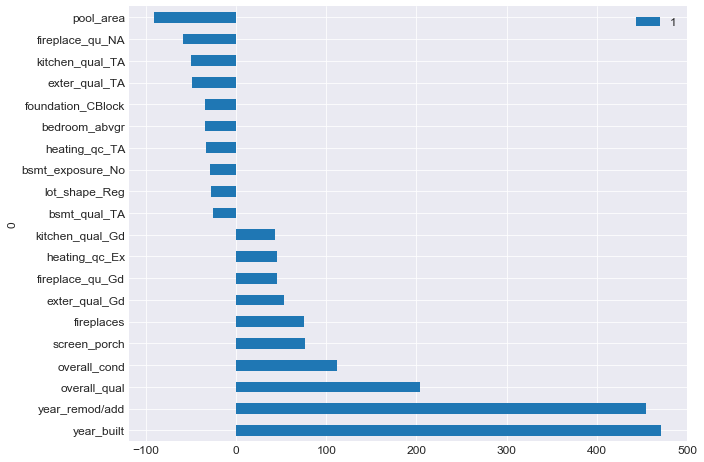

In [107]:
plot_coef(elasticnet)

## Informing Business Value

My models show that the neighborhood a house is in is important. You can see some neighborhoods can add to the sales price while some neighborhoods decrease the price. This makes sense because often times all the houses in a neighborhood are pretty close together and the neighborhood one lives in is a decent indicator of what a home cost.

Thus, it would be best to invest in the neighborhoods (and houses with other features) as shown in the plots above.